# **Heart Disease Risk (Exploratory Data Analysis)**

# Heart Disease Risk Analysis & Prediction  

## Introduction  

Cardiovascular diseases remain one of the leading causes of mortality worldwide.  
This project explores **clinical patient data** to understand the **risk factors associated with heart disease** and to finalize important inferences from the dataset to later build baseline predictive models that assess the likelihood of a patient developing heart diseases.  

The dataset includes features such as:  
-  **Biochemical indicators** (e.g., CPK, platelets)  
-  **Medical history factors** (e.g., high blood pressure, diabetes)  
-  **Demographic attributes** (e.g., age, sex)  

Our aim is:  
 **Exploratory Data Analysis (EDA):**  
   - Identify key trends, correlations, and potential risk factors.  
   - Visualize relationships between clinical features and heart disease outcomes.  
   - Detect noise or redundancy in features that may mislead models.

---

## Project Goals  

-  Gain **insight into medical features** and their relationship with heart disease.  
-  Build an analytical literature provided for building **baseline predictive models** that balances interpretability and performance.  
-  Understand how **individual features (like CPK)** influence overall model behavior. 
-  Document the process clearly for future edits and improvements.  

---

## Methodology Overview  

**1. Data Understanding & Cleaning**  
   - Handle missing values, outliers, and skewed distributions.  

**2. Exploratory Data Analysis**  
   - Univariate, bivariate, and multivariate feature exploration.  
   - Correlation (Pearson/Spearman) and chi-square analysis for feature relevance.  

---

##  Signficance of this Project

To showcase a **base understanding of Data-Preprocessing** , essential for building accurate predictive Models.
It is also a step toward building interpretable models in domains where **context-driven statistics evaluation** is important and **explainability is as important as accuracy**.  

---


#### Setting up Environment

In [1]:
import math, os, warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

file_path = "heart_failure_dataset.csv"

### Importing dataset into a DataFrame

In [2]:
df = pd.read_csv(file_path)

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
print("Shape: ", df.shape)

Shape:  (299, 13)


### Creating a metadata of the dataframe

#### Significance of creating a meta-data of the dataset is:
- It provides a unified overview and a single truth of the dataset given in order to avoid inaccuracies.
- Allows us to determine missing values, unqiueness, outliers,
- Comprehensible descriptions for reproducibility and standardizing analysis workflows.

In [4]:
meta = pd.DataFrame({
    "column" : df.columns,
    "dtype" : [str(df[c].dtype) for c in df.columns],
    "n_unique": [df[c].nunique(dropna = False) for c in df.columns],
    "pct_missing": [df[c].isna().mean() * 100 for c in df.columns],
    "most_freq_val": [df[c].mode(dropna = True)[0] if not df[c].mode(dropna=True).empty else None for c in df.columns],
    "most_freq_pct": [df[c].value_counts(normalize = True, dropna = True).iloc[0] * 100
                      if not df[c].value_counts(normalize = True, dropna = True).empty else None for c in df.columns]
}).sort_values("pct_missing", ascending = False).reset_index(drop=True)

display(meta)

,column,dtype,n_unique,pct_missing,most_freq_val,most_freq_pct
0,age,float64,47,0.0,60.00,11.036789
1,anaemia,int64,2,0.0,0.00,56.856187
2,creatinine_phosphokinase,int64,208,0.0,582.00,15.719064
3,diabetes,int64,2,0.0,0.00,58.193980
4,ejection_fraction,int64,17,0.0,35.00,16.387960
5,high_blood_pressure,int64,2,0.0,0.00,64.882943
6,platelets,float64,176,0.0,263358.03,8.361204
7,serum_creatinine,float64,40,0.0,1.00,16.722408
8,serum_sodium,int64,27,0.0,136.00,13.377926
9,sex,int64,2,0.0,1.00,64.882943


#### semantically correcting the required columns

In [5]:
df.rename(columns = {"time": "days_survived", "creatinine_phosphokinase": "CPK", "ejection_fraction": "EF"}, inplace=True)

### Univariate Analysis

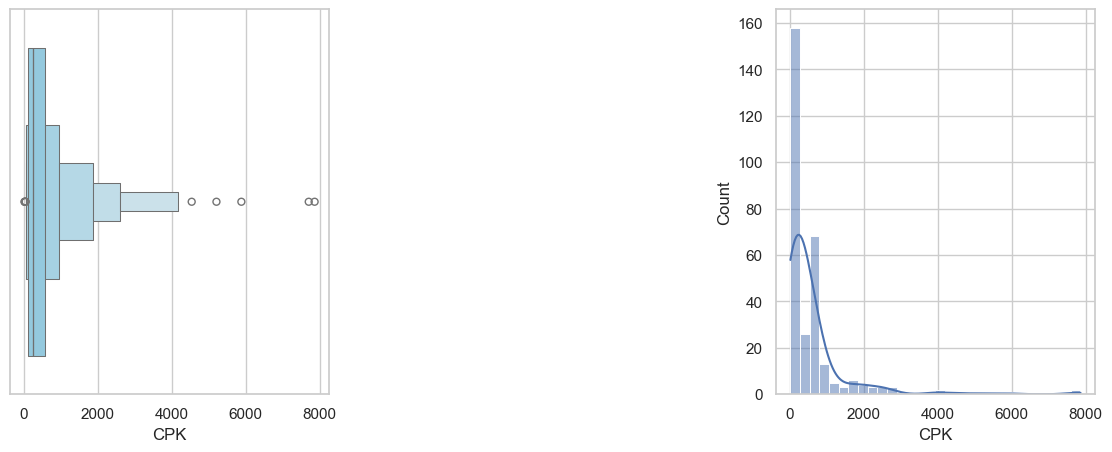

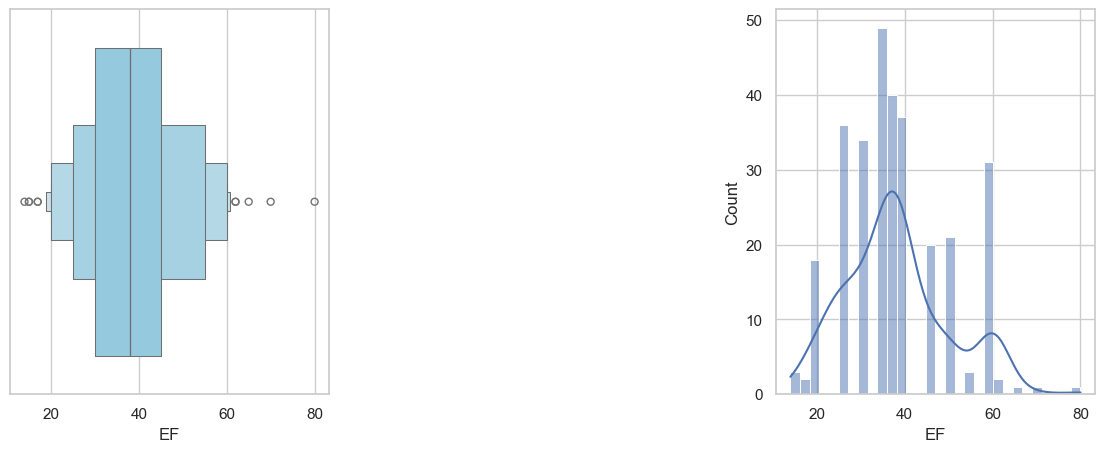

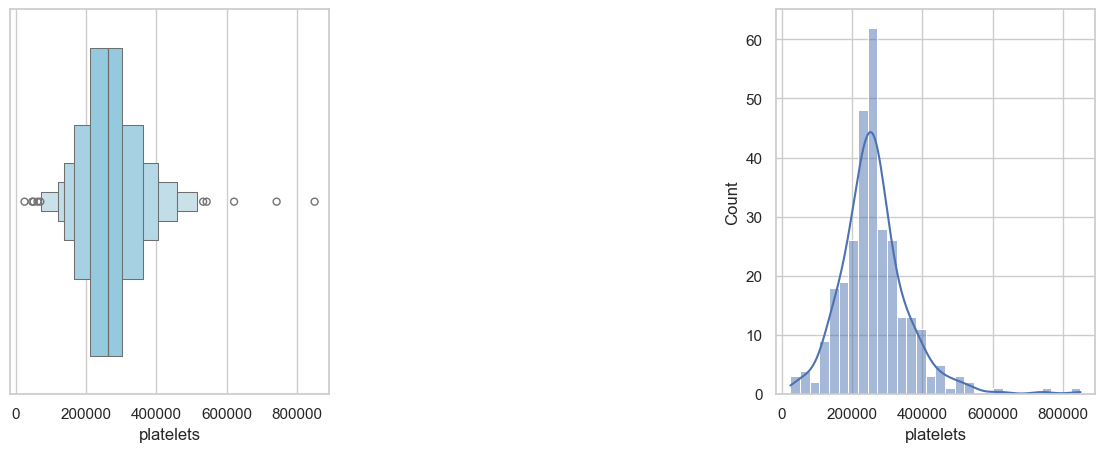

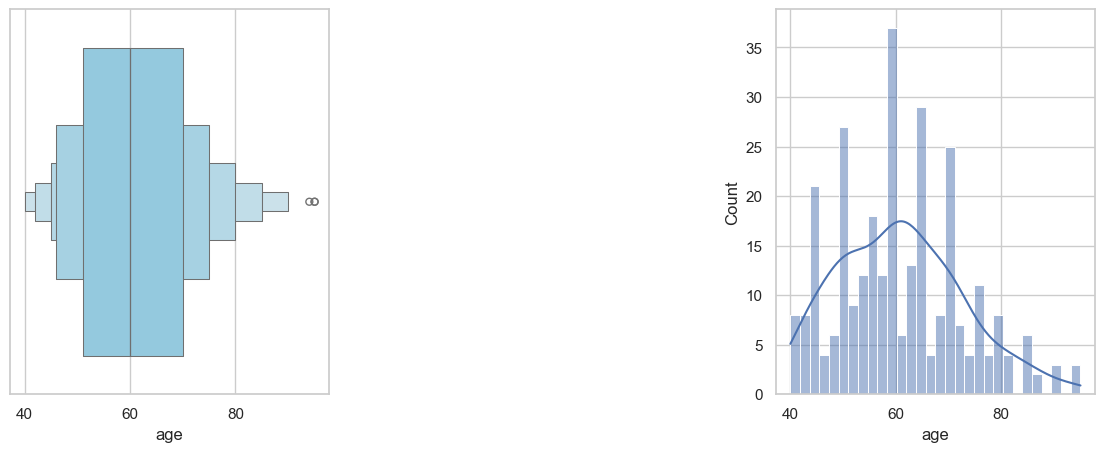

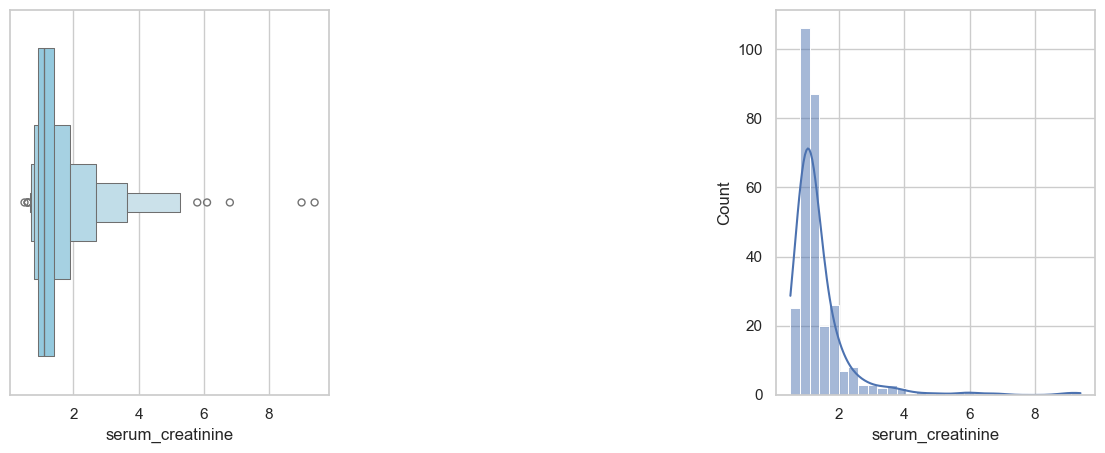

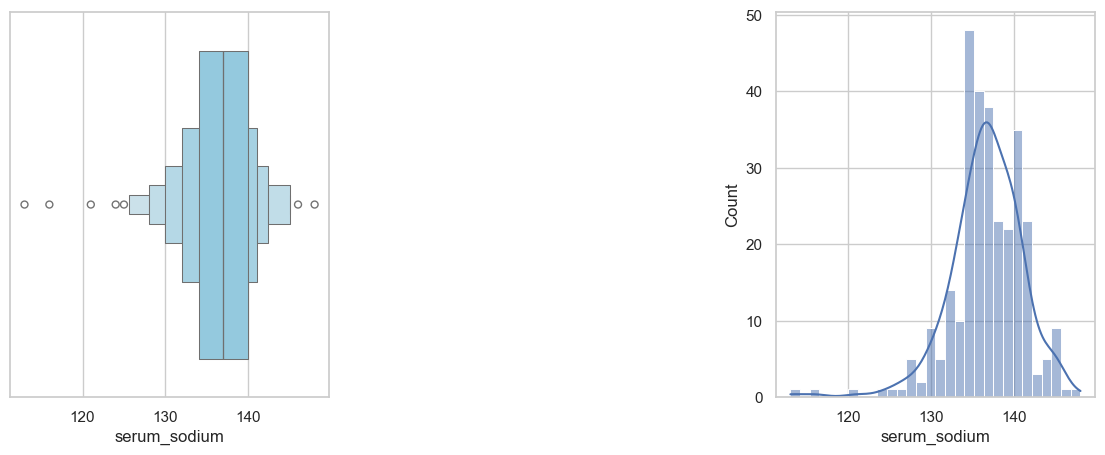

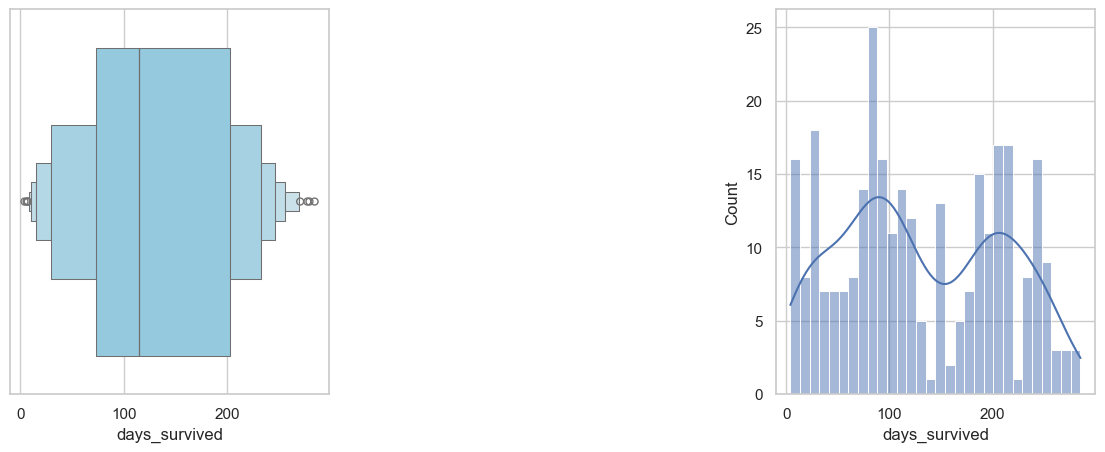

In [6]:
numerical_columns = ["CPK", "EF", "platelets", "age", "serum_creatinine", "serum_sodium", "days_survived" ]
for col in numerical_columns:
    plt.figure(figsize = (14, 5))
    plt.subplot(1,3,1)
    sns.boxenplot(x= df[col], color = 'skyblue')
    plt.subplot(1,3,3)
    sns.histplot(x= df[col], kde = True, bins = 30)

plt.show()

### Statistical - Intuitive Inference per Feature:
- **CPK levels:** Graphs show large clustering of values on the lower ranges (most patient's CPK levels are present at lower values) while the overall range of values vary widely towards the right (as proven by both boxen-plots and histogram plots), indicating **heavy right-skewness**.

   Elevated CPK reflects muscle damage, clinically verified by medical-literature. The distribution suggests most patients have normal ranges of CPK whereas outliers show extreme case scenarios. Our Hypothesis for this feature is that while **CPK may not be a strong bio-indicator on its own**, it could be a good **supporting feature** used to fine tune our predictive model. A correlation test may help prove/disprove this hypothesis.
---
- **Ejection Factor (EF):** indicates almost symmetric distribution near the median (approx. 40) with only a few outliers. The histogram plot shows a multimodal plot with a primary mode slightly below 40 and a secondary peak around 60. (From clinical context: EF < 40% indicate heart-failure, EF within 40-49% indicate borderline heart-failure, EF > 50% indicate normal ejection fraction) => This indicates that patients with heart-failure dominate the dataset. This subpopulation between patients that do have heart-failure versus those who don't cause this Bimodal plot. We require separating this subpopulation to determine feature importance.
---
- **Platelets:** Both boxenplots and histoplot show a slightly balanced distribution with light right-tail.
---
- **Age:** Symmetric distribution around the median which is age 60 but the even distribution spans well between 50-70 years of age. Outliers exist in the extreme ranges but the density of the values is low as expressed by the boxplots.
---
- **Serum Creatinine:** Most values are dense and clustered around the lower values with a heavy right-tail due to outliers making this a right-skewed distribution.
---
- **Serum Sodium:** Nearly unimodal distribution. Most values are evenly distributed around approx. 130 which are normal sodium levels. The thin boxes suggest tight clustering of values around the median with low variance. 
--- 
- **Days Survived:** The distribution is clearly multimodal, with 3 subgroups indicating acute survivors (approx. 80 days), mid-term survivors (approx. 150 days) and long-term survivors (approx. 220 days).

In [7]:
Binary_cols = ['diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
for col in Binary_cols:
    df[col] = df[col].astype('category')

df['age'] = df['age'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  299 non-null    int64   
 1   anaemia              299 non-null    int64   
 2   CPK                  299 non-null    int64   
 3   diabetes             299 non-null    category
 4   EF                   299 non-null    int64   
 5   high_blood_pressure  299 non-null    category
 6   platelets            299 non-null    float64 
 7   serum_creatinine     299 non-null    float64 
 8   serum_sodium         299 non-null    int64   
 9   sex                  299 non-null    category
 10  smoking              299 non-null    category
 11  days_survived        299 non-null    int64   
 12  DEATH_EVENT          299 non-null    category
dtypes: category(5), float64(2), int64(6)
memory usage: 20.9 KB


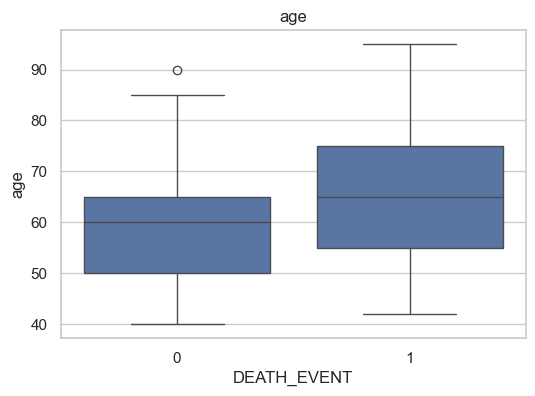

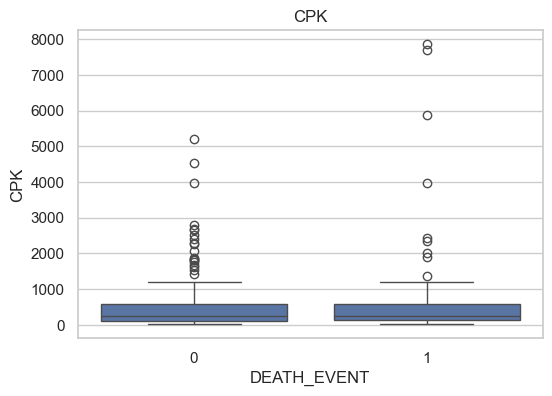

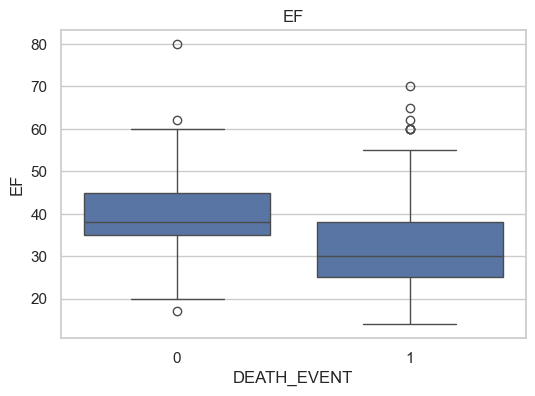

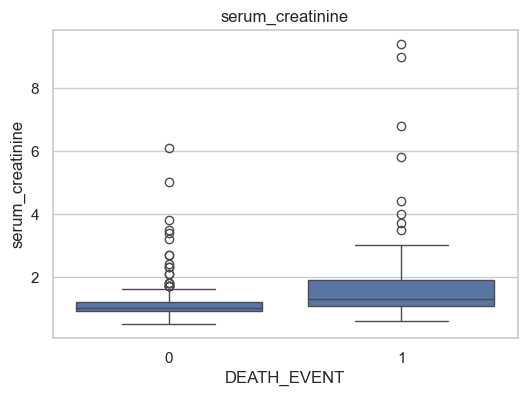

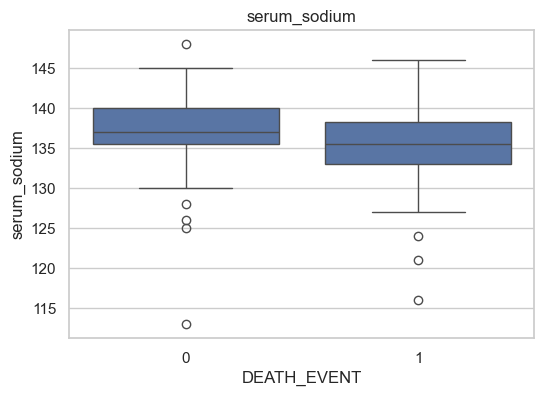

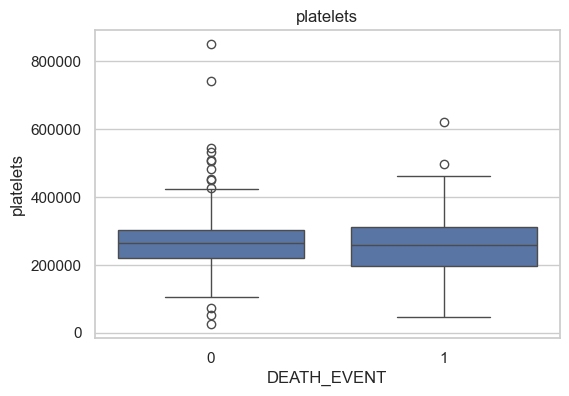

In [21]:

numerical_features = ['age','CPK', 'EF', 'serum_creatinine', 'serum_sodium','platelets']
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x= 'DEATH_EVENT', y = col, data = df)
    plt.title(col)
    plt.show()

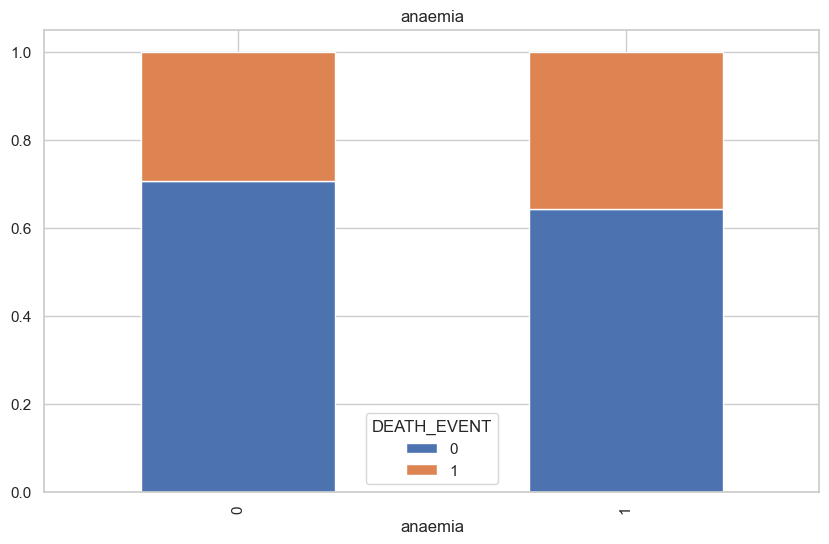

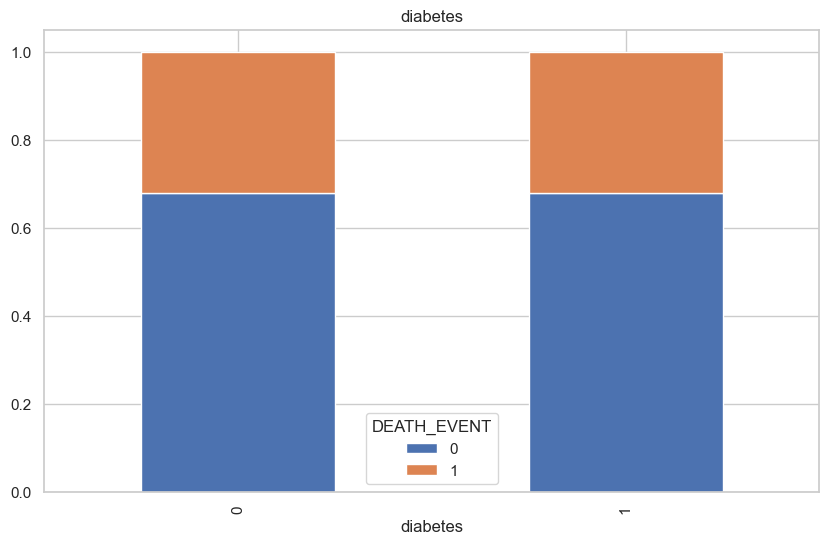

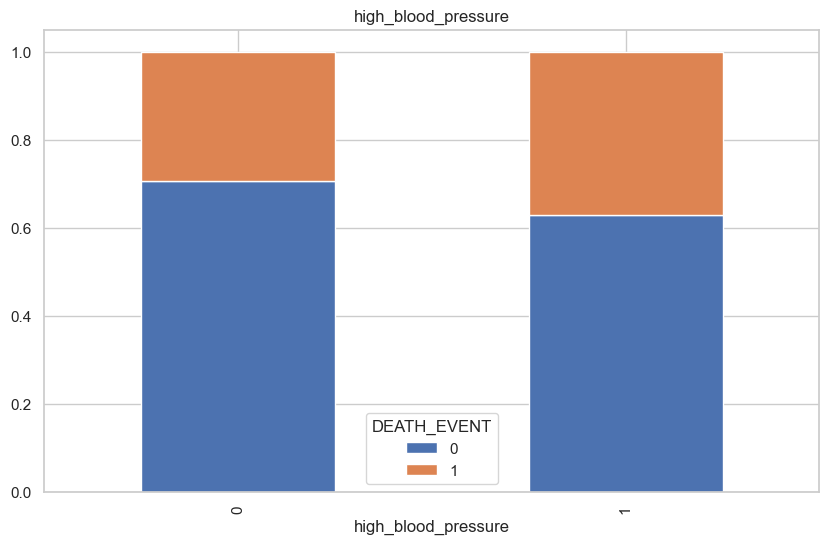

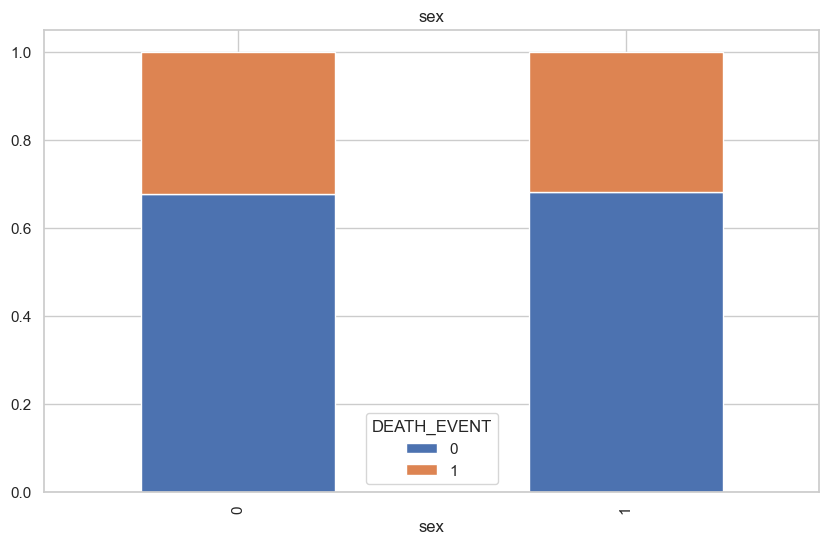

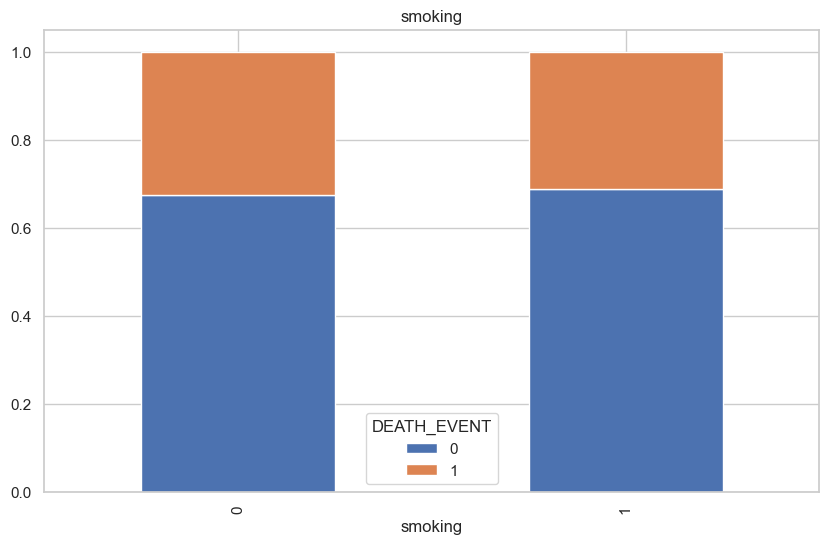

In [11]:
categorical_features = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

for col in categorical_features:
    ct = pd.crosstab(df[col], df['DEATH_EVENT'], normalize='index')
    ct.plot(kind='bar', stacked=True)
    plt.title(col)
    plt.show()


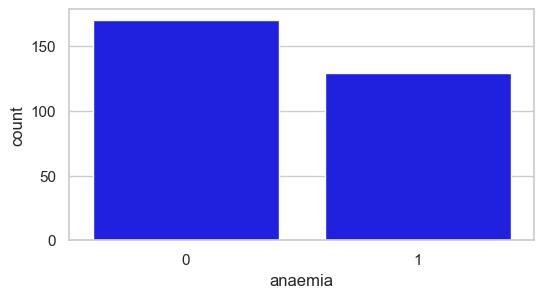

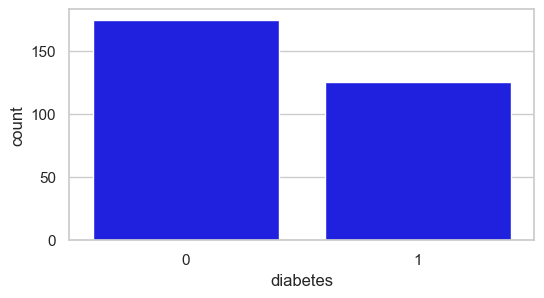

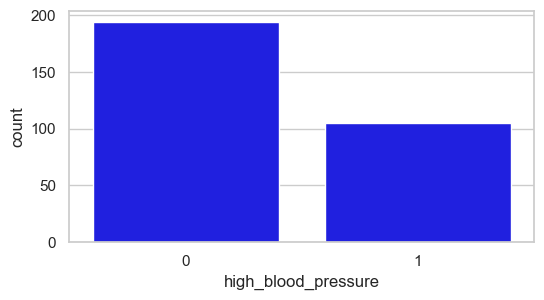

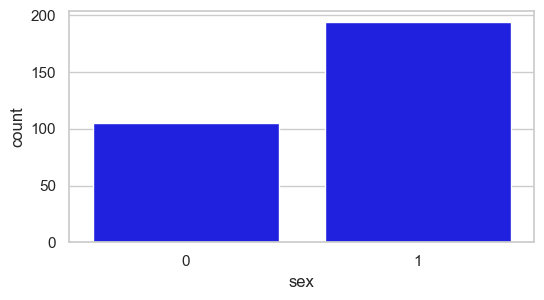

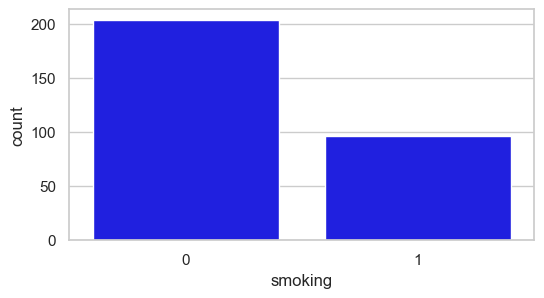

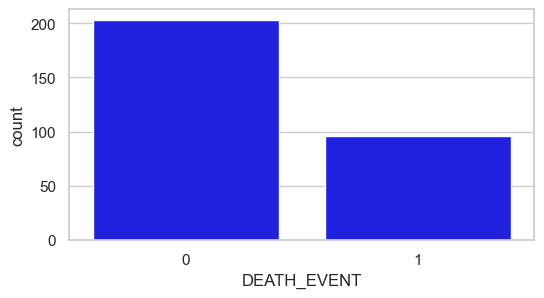

In [13]:
categorical_columns = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT" ]
for col in categorical_columns:
    plt.figure(figsize = (6, 3))
    sns.countplot(x= df[col], color = 'blue')

plt.show()

---
### Notable Inferences:
- The **DEATH_EVENT** feature is unbalanced, with **survivor patients dominating the dataset**. This could affect sampling when performing train/test split for models and allow room for biasing.
  #### Addressing Class Imabalance of Target Variable:
  - Firstly analyze the metrics in the classification report of a Logistic Regression Model to determine drawbacks of the dataset.
  - Use Class-Weight Balancing in Logistic Regression model as it penalizes the minority class heavier for false negatives, allowing the model to be evaluated much more appropriately.
  - Focus on Recall score and ROC-AUC since in the medical context False Negatives are much costlier than False Positives, this ensures domain relavence and priority to high-risk cases in exchange for lower accuracy score.
---

#### Checking skewness of creatinine_phosphokinase 

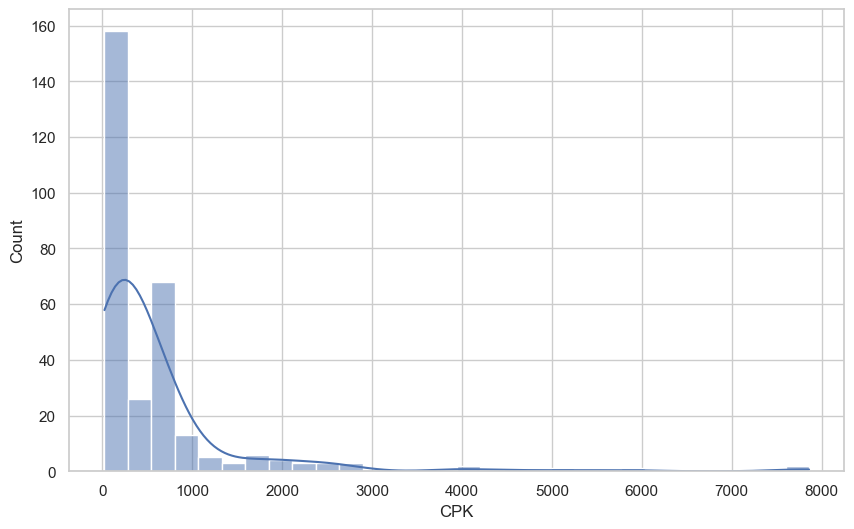

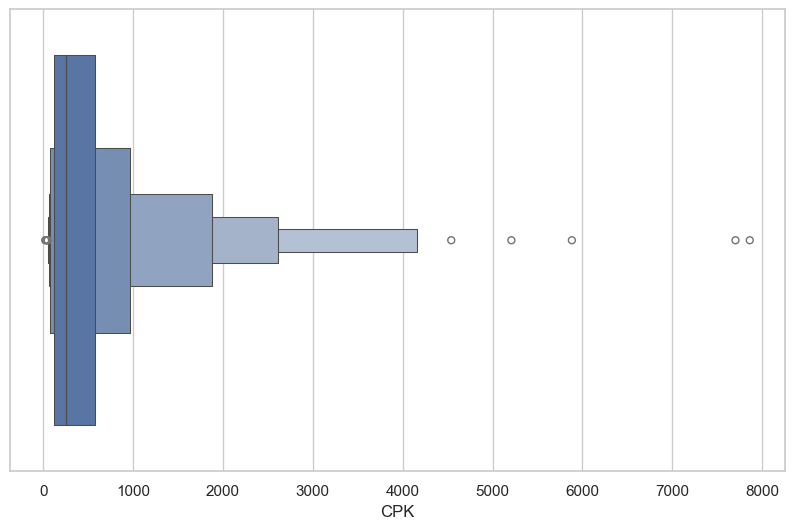

In [15]:
sns.histplot(df["CPK"], kde = True, bins = 30)
plt.show()

sns.boxenplot(x=df["CPK"])
plt.show()

### CPK Levels Insight and Inference
- The distribution of `creatine_phosphokinase` is **heavily right-skewed**, with most patients having values in **normal range** and few patients with extremely high levels.
- The boxen plot confirms that while outliers exist at very high CPK levels, most patients cluster at the lower end of the range.
- Importantly, this shows that most patients that suffered heartfailure still had **Normal levels of CPK**. This suggests that:
  - **CPK alone might not be a strong standalone predictor** of heart failure
  - Extremely high CPK values may still be clinically accurate, possibly inidcating acute or severe cases.
- To assess its role more insightfully:
  - A **grouped comparison** such as plotting CPK across survival vs death to check if distributions differ.
  - A **statistical test** like Mann-Whitney U test, since the data is skewed to check if those differences are significant.
- In practice, CPK levels may be treated as a **complementary feauture**, contributing to predictions only when combined with other clinical indicators.

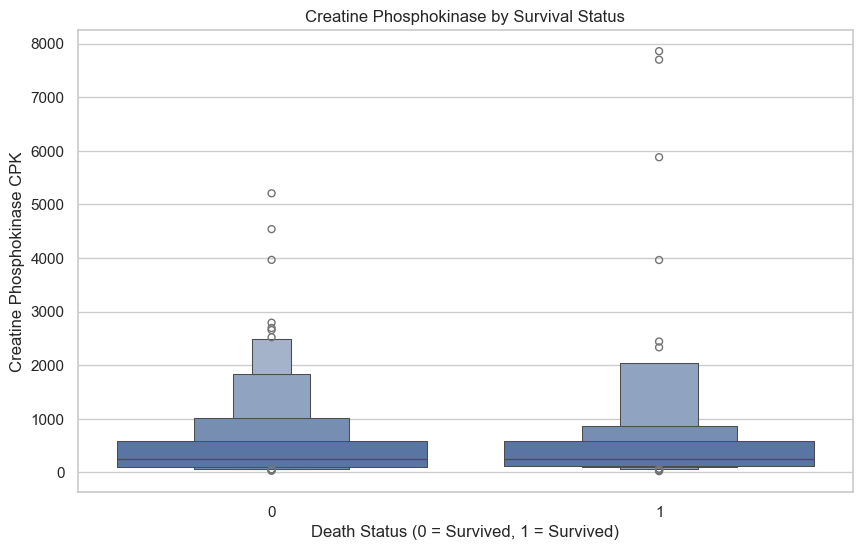

In [16]:
sns.boxenplot(x = "DEATH_EVENT", y = "CPK", data=df)
plt.title("Creatine Phosphokinase by Survival Status")
plt.xlabel("Death Status (0 = Survived, 1 = Survived)")
plt.ylabel("Creatine Phosphokinase CPK")
plt.show()

In [17]:
df.groupby("DEATH_EVENT")["CPK"].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,540.054187,753.799572,30.0,109.00,245.0,582.0,5209.0
1,96.0,670.197917,1316.580640,23.0,128.75,259.0,582.0,7861.0


In [19]:
df['CPK_log'] = np.log1p(df['CPK'])
threshold = df['CPK'].quantile(0.95)
df['CPK_high'] = (df['CPK'] > threshold).astype(int)

## Bivariate Analysis

### Method: Spearman Correlation Matrix
We use Spearman Correleation method since our dataset has non-parameteric features and we require a visualization of monotonic relationships between features and DEATH_EVENT, Which is why we choose Spearman over Pearson's Correlation.

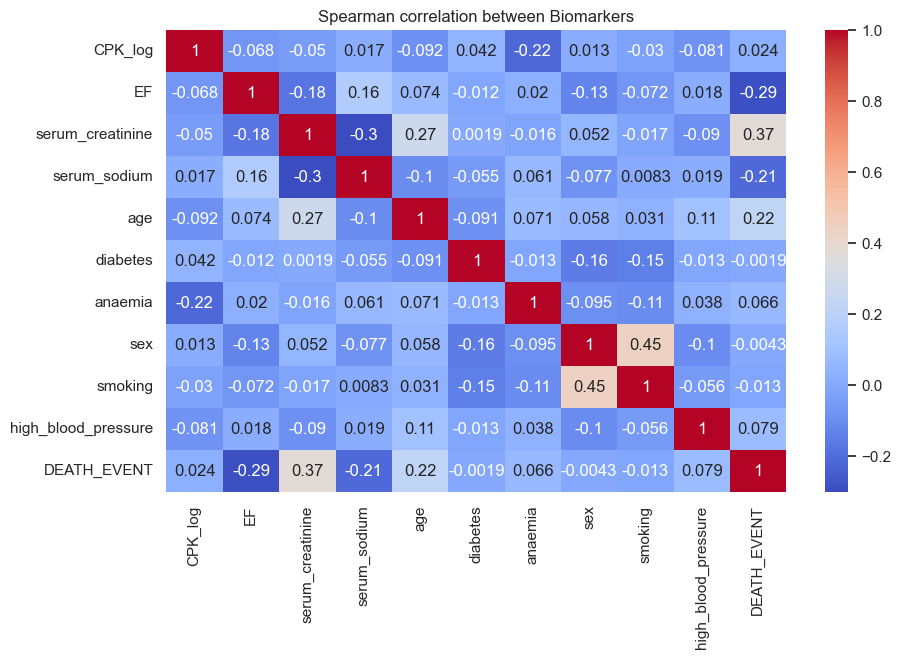

In [20]:
corr_matrix = df[['CPK_log', 'EF', 'serum_creatinine', 'serum_sodium', "age", "diabetes", "anaemia", "sex", "smoking", "high_blood_pressure", "DEATH_EVENT"]].corr(method = 'spearman')
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title("Spearman correlation between Biomarkers")
plt.show()

### Interpreting collinearity matrix
- CPK values show **weak and negative relation with EF and Serum Creatinine** which is **not strongly coupled in this cohort**. Clinical literature defines relationship between CPK and EF, serum creatinine, Serum Sodium to be non-monotonic which the Spearman Correlation model can fail to address. This explains the seemingly deviating results.
- The relationship between Death-Event and features have a monotonic relation and so the features EF, Serum Creatinine, Serum Sodium and Age exhibit Coeffeciants of dominant values compared to the near-zero values of other features.

**Final Verdict:** From the given correation matrix, the features: EF, Serum Creatinine, Serum Sodium and Age are considered to be Primary indicators used for predictive modelling.

### Multivariate Analysis

We shall test a Logistic Regression Model using the key features we have distinguished from our previous analysis and verify if the secondary features add any relevance to our predictive model

In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [60]:
features = ['EF', 'serum_creatinine', 'serum_sodium', 'age', 'anaemia', 'high_blood_pressure']
features_with_cpk = features + ['CPK_log', "sex", "smoking", "diabetes", "high_blood_pressure", "anaemia"]
X_base = df[features]
X_with_cpk = df[features_with_cpk]
Y = df['DEATH_EVENT']

In [61]:
X_train_A, X_test_A, Y_train, Y_test = train_test_split(X_base, Y, test_size = 0.2, random_state = 42, stratify = Y)
X_train_B, X_test_B, Y_train, Y_test = train_test_split(X_with_cpk, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [62]:
model_A = LogisticRegression(max_iter = 1000)
model_A.fit(X_train_A, Y_train)
Y_pred_A = model_A.predict(X_test_A)
Y_prob_A = model_A.predict_proba(X_test_A)[:,1]

model_B = LogisticRegression(max_iter=1000)
model_B.fit(X_train_B, Y_train)
Y_pred_B = model_B.predict(X_test_B)
Y_prob_B = model_B.predict_proba(X_test_B)[:,1]

print("Model A (without supporting features):")
print("Accuracy:", accuracy_score(Y_test, Y_pred_A))
print("ROC AUC:", roc_auc_score(Y_test, Y_prob_A))
print(classification_report(Y_test, Y_pred_A))

print("\nModel B (with supporting features):")
print("Accuracy:", accuracy_score(Y_test, Y_pred_B))
print("ROC AUC:", roc_auc_score(Y_test, Y_prob_B))
print(classification_report(Y_test, Y_pred_B))

Model A (without supporting features):
Accuracy: 0.7333333333333333
ROC AUC: 0.7830551989730423
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.62      0.42      0.50        19

    accuracy                           0.73        60
   macro avg       0.69      0.65      0.66        60
weighted avg       0.72      0.73      0.72        60


Model B (with supporting features):
Accuracy: 0.7166666666666667
ROC AUC: 0.7599486521181001
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.57      0.42      0.48        19

    accuracy                           0.72        60
   macro avg       0.67      0.64      0.64        60
weighted avg       0.70      0.72      0.70        60



We find the **Accuracy of Model A > Accuracy of Model B**

### Model Performance Interpretation
- We see that the accuracy of Model A is slightly greater than Model B with a recall drop for Class = 1 in Model B. This further proves our previous Spearman Correlation matrix, indicating that these secondary features **potentially introduce noise** and have **no meaningful contribution** to the predictive model.
- Both Models show little difference in mortality discrimination **(ROC-AUC = 78-75%)** and **poor recall (42)** likely due to **class imbalance of target variable**.

In [22]:
jupyter nbconvert Heart_EDA.ipynb --to html --no-input --no-prompt

SyntaxError: invalid syntax (4291970208.py, line 1)